# Kmeans with Local Expension
___

In [1]:
from utils.utils import *
from utils.visualization import *
from utils.communities_network import *
from utils.iterative_greedy_algorithm import IG
from utils.kmeans import * 
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
output_animation_path = "output/animations"
algorithms_trace = []

## Test

### 1.1 Dolphins

In [4]:

file_path = 'data/reel/dolphins/dolphins.gml'
G = nx.read_gml(file_path, label='id')
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
true_labels = read_community_labels_file_reel(
    'data/reel/dolphins/groundTruth.txt')
print(f"The graph contains {adj_matrix.shape[0]} nodes.")

The graph contains 62 nodes.


In [5]:

start_time = time.time()
Cmax, Qmax, Kbest , Labels , trace = local_expansion_kmeans(G, adj_matrix, 2, 16 )
end_time = time.time()


for item in trace:

    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))
    
new_methode_time = end_time - start_time
new_methode_modularity = Qmax
new_methode_nmi = trace[Kbest-2]["NMI"]
new_methode_nb_communities = len(Cmax)

algorithms_trace.append({"name": "new_methode", "duration": new_methode_time , "modularity":new_methode_modularity, "nmi":new_methode_nmi, "nb_communities":new_methode_nb_communities})

custom_df_styling(trace)

K,Modularity,NMI
2,0.286045,0.240568
3,0.348345,0.428583
4,0.396741,0.390049
5,0.330644,0.333491
6,0.353783,0.324312
7,0.295004,0.356869
8,0.228927,0.282847
9,0.260512,0.292091
10,0.247063,0.285726
11,0.188481,0.284940


The animation GIF is saved in output/animations/dolphins.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


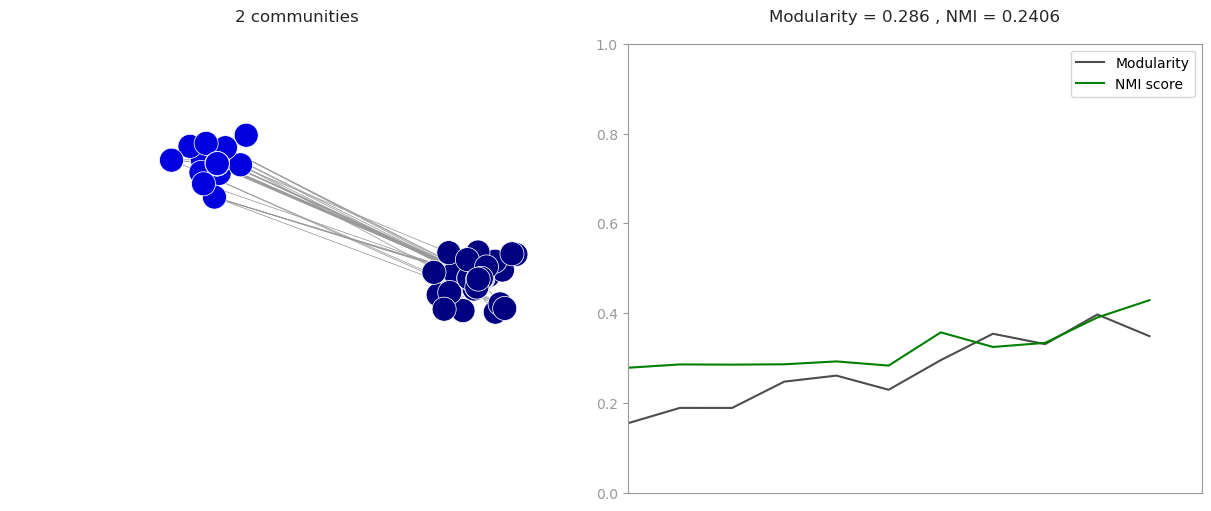

In [6]:

x = clusters_animation(adj_matrix, trace[::-1],dark=False,duration=20,filename=f"{output_animation_path}/dolphins.gif" ,  dpi = 200)

#### Iterated Greedy

In [7]:

start_time = time.time()
communitites, modularity_trace, _, _ = IG(adj_matrix, 15, 0.5)
end_time = time.time()

ig_nmi = calc_nmi(true_labels,communities_to_labels(G,communitites,original_nodes))
ig_mod = modularity_trace[-1]
ig_time = end_time - start_time
ig_nb_communities = len(communitites)

algorithms_trace.append({"name": "IG", "duration":ig_time , "modularity":ig_mod, "nmi":ig_nmi, "nb_communities":ig_nb_communities})

IG:   0%|          | 0/15 [00:00<?, ?it/s]

#### Louvain

In [8]:
start = time.time()
partition , mod = louvain(G) 
end = time.time()

louvain_nmi = calc_nmi(true_labels, partition.items())
louvain_time = end - start
louvain_mod = mod
louvain_nb_communities = len(set(partition.values()))

algorithms_trace.append({"name": "Louvain", "duration":louvain_time , "modularity":louvain_mod, "nmi":louvain_nmi, "nb_communities":louvain_nb_communities})


In [9]:
start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = kmeans_random(G, adj_matrix, 2, 20)

end_time = time.time()


for item in trace:
    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))

kmeans_time = end_time - start_time
kmeans_modularity = Qmax
kmeans_nmi = trace[Kbest-2]["NMI"]
kmeans_nb_communities = len(Cmax)

algorithms_trace.append({"name": "Kmeans", "duration":kmeans_time , "modularity":kmeans_modularity, "nmi":kmeans_nmi, "nb_communities":kmeans_nb_communities})

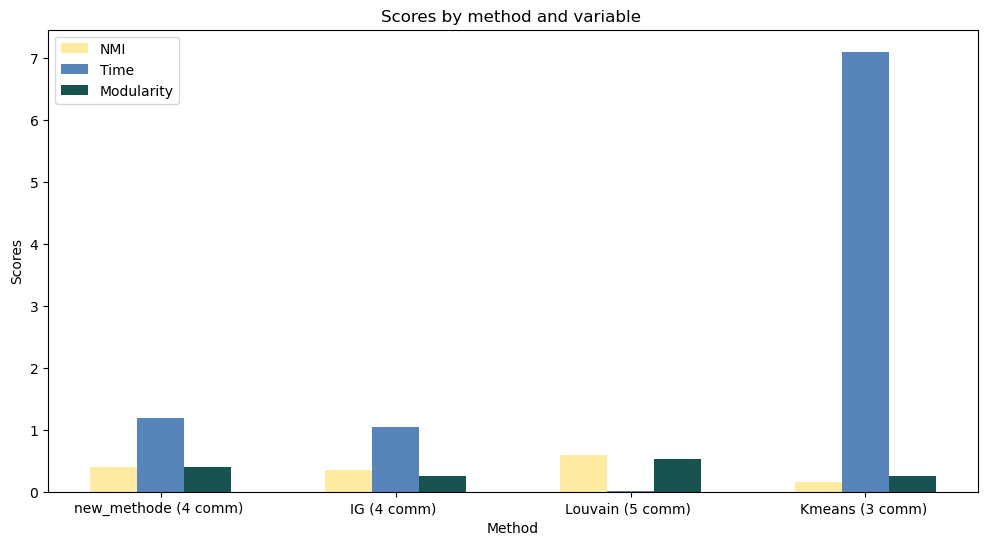

In [10]:
# Sample data
n_groups = len(algorithms_trace)
# NMI for Louvain, IG, New Method
nmi = [algo["nmi"] for algo in algorithms_trace]
# Time for Louvain, IG, New Method
duration = [algo["duration"] for algo in algorithms_trace]
# Modularity for Louvain, IG, New Method
modularity = [algo["modularity"] for algo in algorithms_trace]

# Create plot

fig, ax = plt.subplots(figsize=(12, 6))

index = np.arange(n_groups)
bar_width = 0.2


rects1 = plt.bar(index, nmi, bar_width,
                 color='#FEEAA1',
                 label='NMI')

rects2 = plt.bar(index + bar_width, duration, bar_width,
                 color='#5784BA',
                 label='Time')

rects3 = plt.bar(index + 2 * bar_width, modularity, bar_width,
                 color='#18534F',
                 label='Modularity')



plt.xlabel('Method')
plt.ylabel('Scores')
plt.title('Scores by method and variable ')


plt.xticks(index + bar_width, [f"{algo['name']} ({algo['nb_communities']} comm) " for algo in algorithms_trace])

plt.legend()
plt.show()

___

In [11]:
algorithms_trace = []

### 1.2 Karate

In [12]:

file_path = 'data/reel/karate/karate.gml'
G = nx.read_gml(file_path, label='id')
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
true_labels = read_community_labels_file_reel(
    'data/reel/karate/groundTruth.txt')
print(f"The graph contains {adj_matrix.shape[0]} nodes.")

The graph contains 34 nodes.


In [13]:

start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 16)
end_time = time.time()


for item in trace:
    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))


new_methode_time = end_time - start_time
new_methode_modularity = Qmax
new_methode_nmi = trace[Kbest-2]["NMI"]
new_methode_nb_communities = len(Cmax)


algorithms_trace.append({"name": "new_methode", "duration": new_methode_time, "modularity": new_methode_modularity,
                        "nmi": new_methode_nmi, "nb_communities": new_methode_nb_communities})


custom_df_styling(trace) 

K,Modularity,NMI
2,0.371466,1.000000
3,0.342209,0.783603
4,0.355934,0.731654


The animation GIF is saved in output/animations/karate.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


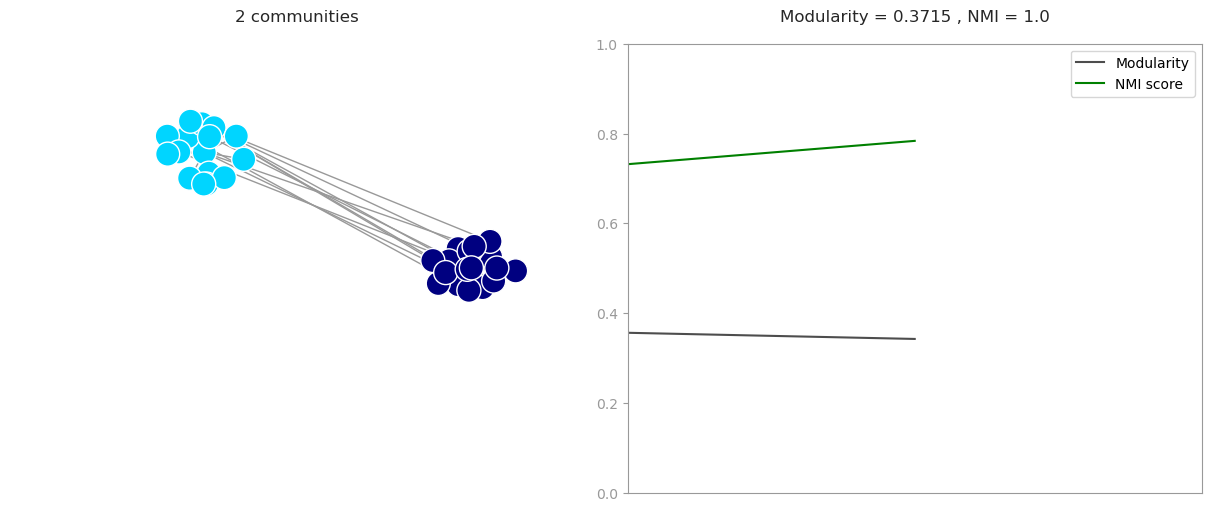

In [14]:

x = clusters_animation(adj_matrix, trace[::-1], dark=False,duration=20,filename=f"{output_animation_path}/karate.gif" ,  dpi = 200)

#### Iterated Greedy

In [15]:

start_time = time.time()
communitites, modularity_trace, _, _ = IG(adj_matrix, 15, 0.5)
end_time = time.time()

ig_nmi = calc_nmi(true_labels, communities_to_labels(
    G, communitites, original_nodes))
ig_mod = modularity_trace[-1]
ig_time = end_time - start_time
ig_nb_communities = len(communitites)

algorithms_trace.append({"name": "IG", "duration": ig_time , "modularity":ig_mod, "nmi":ig_nmi, "nb_communities":ig_nb_communities})

IG:   0%|          | 0/15 [00:00<?, ?it/s]

#### louvain

In [16]:
start = time.time()
partition, mod = louvain(G)
end = time.time()

louvain_nmi = calc_nmi(true_labels, partition.items())
louvain_time = end - start
louvain_mod = mod
louvain_nb_communities = len(set(partition.values()))

algorithms_trace.append({"name": "Louvain", "duration": louvain_time, "modularity": louvain_mod,
                        "nmi": louvain_nmi, "nb_communities": louvain_nb_communities})

#### kmeans_random

In [17]:
start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = kmeans_random(G, adj_matrix, 2, 20)

end_time = time.time()


for item in trace:
    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))

kmeans_time = end_time - start_time
kmeans_modularity = Qmax
kmeans_nmi = trace[Kbest-2]["NMI"]
kmeans_nb_communities = len(Cmax)

algorithms_trace.append({"name": "Kmeans", "duration": kmeans_time , "modularity":kmeans_modularity, "nmi":kmeans_nmi, "nb_communities":kmeans_nb_communities})

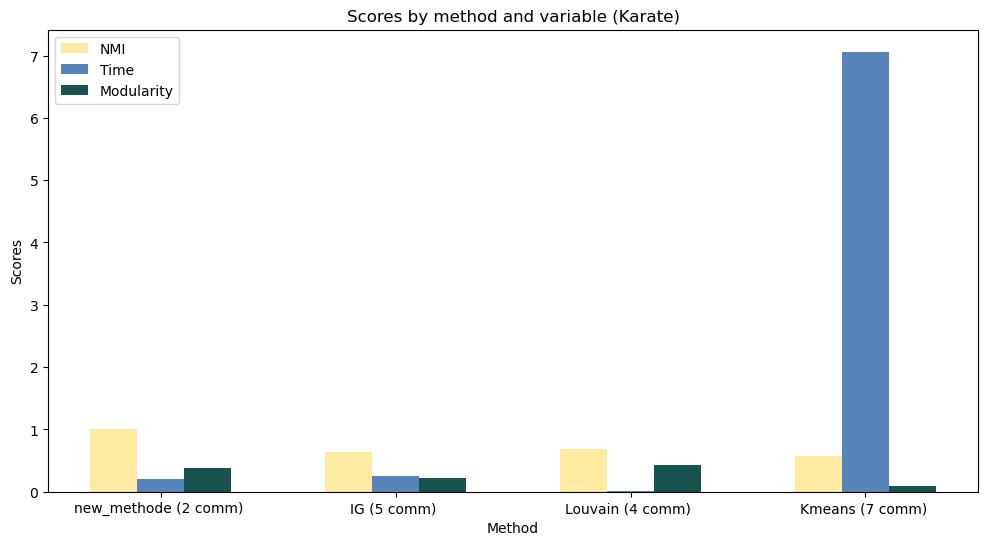

In [18]:
# Sample data
n_groups = len(algorithms_trace)
# NMI for Louvain, IG, New Method
nmi = [algo["nmi"] for algo in algorithms_trace]
# Time for Louvain, IG, New Method
duration = [algo["duration"] for algo in algorithms_trace]
# Modularity for Louvain, IG, New Method
modularity = [algo["modularity"] for algo in algorithms_trace]

# Create plot

fig, ax = plt.subplots(figsize=(12, 6))

index = np.arange(n_groups)
bar_width = 0.2


rects1 = plt.bar(index, nmi, bar_width,
                 color='#FEEAA1',
                 label='NMI')

rects2 = plt.bar(index + bar_width, duration, bar_width,
                 color='#5784BA',
                 label='Time')

rects3 = plt.bar(index + 2 * bar_width, modularity, bar_width,
                 color='#18534F',
                 label='Modularity')


plt.xlabel('Method')
plt.ylabel('Scores')
plt.title('Scores by method and variable (Karate)')


plt.xticks(index + bar_width,
           [f"{algo['name']} ({algo['nb_communities']} comm) " for algo in algorithms_trace])

plt.legend()
plt.show()

___

### Synth Dataset

#### LRF 015

In [19]:

file_path = 'data/synth/LFR/0.15/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

128

In [20]:
true_communities = read_community_labels_file_synth("data/synth/LFR/0.15/community.dat" )

In [21]:
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 7 )

In [22]:
for item in trace:
    item["NMI"] = calc_nmi(true_communities, communities_to_labels(
        G, item["communities"], original_nodes))


custom_df_styling(trace)

K,Modularity,NMI
2,0.302734,0.577160
3,0.504883,0.857143
4,0.601562,1.000000
5,0.493042,0.942591
6,0.392334,0.890290
7,0.288696,0.843488


The animation GIF is saved in output/animations/LRF015.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


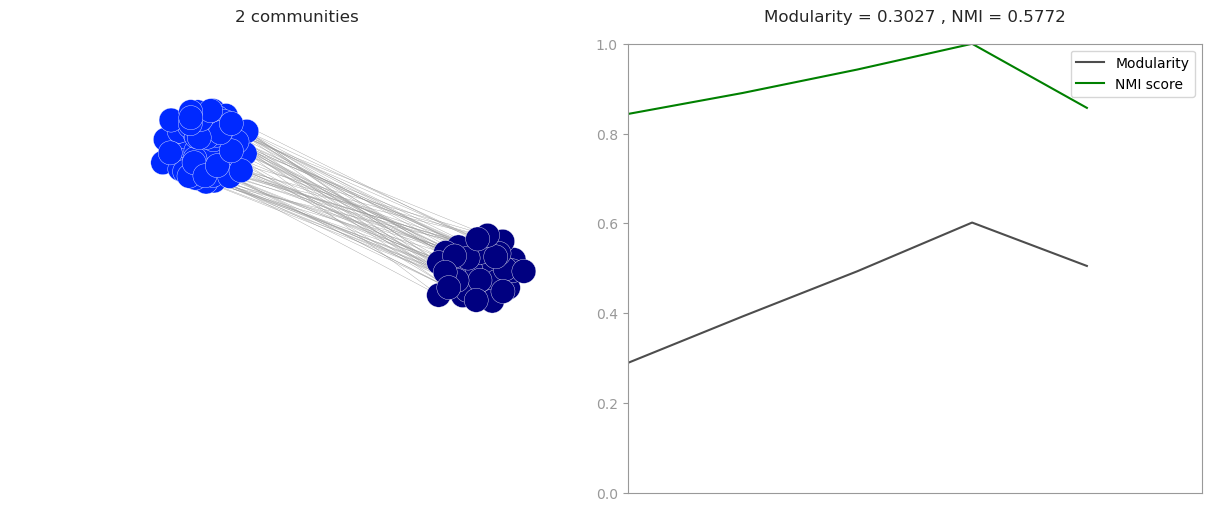

In [23]:
x = clusters_animation(adj_matrix, trace[::-1], dark=False, duration=20,filename=f"{output_animation_path}/LRF015.gif" ,  dpi = 200)

___

#### LRF040

In [24]:

file_path = 'data/synth/LFR/0.40/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

128

In [25]:
true_communities = read_community_labels_file_synth(
    "data/synth/LFR/0.40/community.dat")

In [26]:
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 7)

In [27]:
for item in trace:
    item["NMI"] = calc_nmi(true_communities, communities_to_labels(
        G, item["communities"], original_nodes))


custom_df_styling(trace)

K,Modularity,NMI
2,0.240234,0.599793
3,0.295776,0.831004
4,0.347656,1.000000
5,0.292969,0.943706
6,0.218384,0.870775
7,0.195557,0.828482


The animation GIF is saved in output/animations/LRF040.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


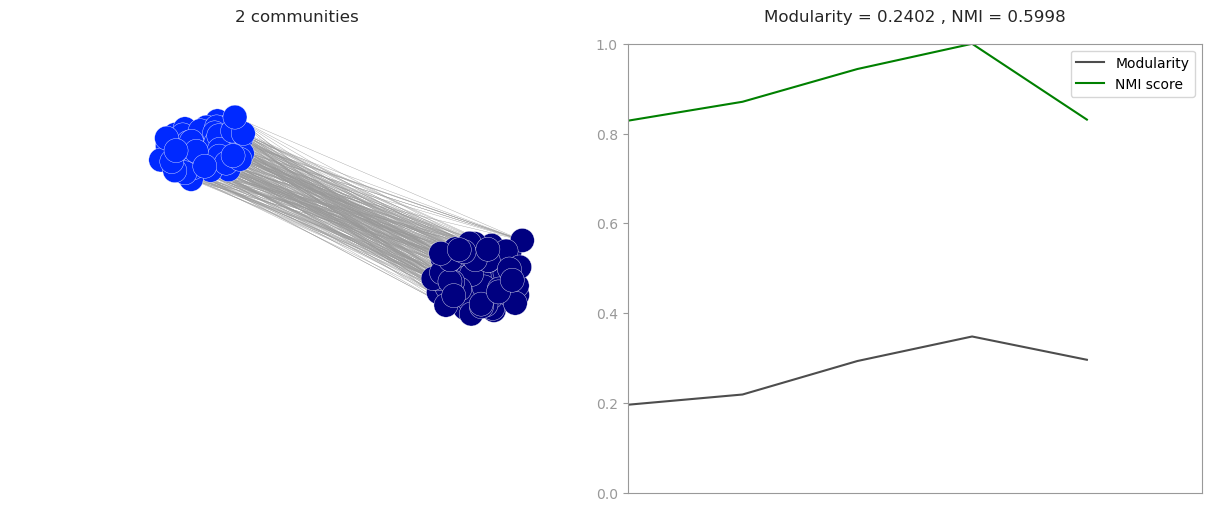

In [28]:
x = clusters_animation(adj_matrix, trace[::-1], dark=False, duration=20, filename=f"{output_animation_path}/LRF040.gif" ,  dpi = 200)

___

#### LRF050

In [29]:

file_path = 'data/synth/LFR/0.50/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

128

In [30]:
true_communities = read_community_labels_file_synth(
    "data/synth/LFR/0.50/community.dat")

In [31]:
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 7)

In [32]:
for item in trace:
    item["NMI"] = calc_nmi(true_communities, communities_to_labels(
        G, item["communities"], original_nodes))


custom_df_styling(trace)

K,Modularity,NMI
2,-0.121094,0.036575
3,-0.091309,0.155362
4,-0.045776,0.123433
5,-0.051880,0.125205
6,-0.045776,0.165747
7,-0.027588,0.227866


The animation GIF is saved in output/animations/LRF040.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


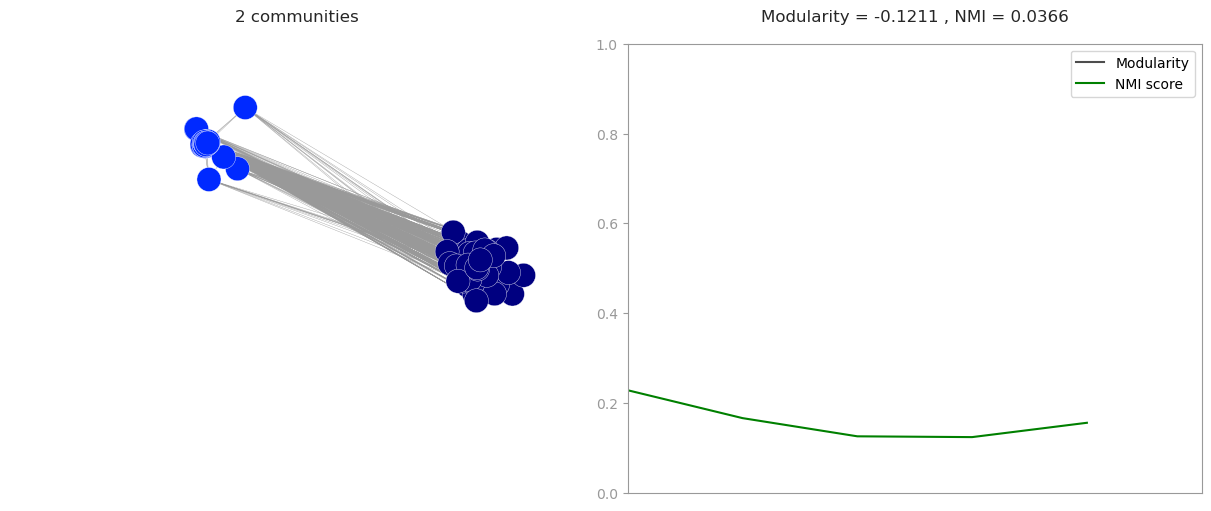

In [33]:
x = clusters_animation(adj_matrix, trace[::-1], dark=False, duration=20,
                       filename=f"{output_animation_path}/LRF040.gif",  dpi=200)

In [34]:

file_path = 'data/synth/LFR/0.50/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]


true_communities = read_community_labels_file_synth(
    "data/synth/LFR/0.50/community.dat")

In [35]:
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 7 , metric="QSim")

In [36]:
for item in trace:
    item["NMI"] = calc_nmi(true_communities, communities_to_labels(
        G, item["communities"], original_nodes))


custom_df_styling(trace)

K,Modularity,NMI
2,-0.056641,0.036575
3,-0.041748,0.155362
4,-0.018982,0.123433
5,-0.022034,0.125205
6,-0.018982,0.165747
7,-0.009888,0.227866


In [37]:
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(
    G, adj_matrix, 2, 7)